## Heart Rate Data EDA

This notebook focus on exploring the Heart Rate dataset exported from Apple Watch, including  
1. **Understand the data** -- What is the level of the data? What is the relationship and difference among the three heart rate types?  
2. **Analyze and visualize the data** -- How is my heart rate distributed? Does it show different patterns on weekday/weekends and on different hours? What is the heart rate distribution and pattern difference between resting heart rate and walking heart rate?  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_rate_df = pd.read_csv('heart_rate.csv', parse_dates = [3,4,5])
heart_rate_df.head()

,type,sourceName,unit,creationDate,startDate,endDate,value
0,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-29 19:45:48-08:00,2019-08-29 19:45:14-08:00,2019-08-29 19:45:14-08:00,93.0
1,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-29 19:50:33-08:00,2019-08-29 19:47:20-08:00,2019-08-29 19:47:20-08:00,89.0
2,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-29 19:56:00-08:00,2019-08-29 19:53:11-08:00,2019-08-29 19:53:11-08:00,87.0
3,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-29 20:02:50-08:00,2019-08-29 19:57:39-08:00,2019-08-29 19:57:39-08:00,78.0
4,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-29 20:07:01-08:00,2019-08-29 20:03:24-08:00,2019-08-29 20:03:24-08:00,84.0


In [3]:
heart_rate_df.dtypes

type                                            object
sourceName                                      object
unit                                            object
creationDate    datetime64[ns, pytz.FixedOffset(-480)]
startDate       datetime64[ns, pytz.FixedOffset(-480)]
endDate         datetime64[ns, pytz.FixedOffset(-480)]
value                                          float64
dtype: object

In [4]:
heart_rate_df.shape

(84831, 7)

In [5]:
heart_rate_df.type.value_counts()

HKQuantityTypeIdentifierHeartRate                  84482
HKQuantityTypeIdentifierRestingHeartRate             178
HKQuantityTypeIdentifierWalkingHeartRateAverage      171
Name: type, dtype: int64

### Q1: What is the level of the data? is it always on second level with startDate = endDate?

1. **HKQuantityTypeIdentifierHeartRate**  
In most of the cases it's on second level (84352/84482), the other 130 have a longer interval (most of them fall around 10 mins);  
2. **HKQuantityTypeIdentifierRestingHeartRate**  
Always has a long time interval, mean is 17 hours;  
3. **HKQuantityTypeIdentifierWalkingHeartRateAverage**  
Always has a long time interval, mean is 20 hours.  

**HKQuantityTypeIdentifierHeartRate**

In [6]:
# number of rows with different startdate and endadate for heart rate type
heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
              (heart_rate_df['type'] == 'HKQuantityTypeIdentifierHeartRate')].shape[0]

130

In [7]:
heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
              (heart_rate_df['type'] == 'HKQuantityTypeIdentifierHeartRate')] 

,type,sourceName,unit,creationDate,startDate,endDate,value
39322,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-12-19 16:47:38-08:00,2019-09-20 08:19:04-08:00,2019-09-20 08:29:25-08:00,128.287
39323,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-12-19 16:47:38-08:00,2019-09-20 08:29:27-08:00,2019-09-20 08:38:51-08:00,132.446
40196,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-12-22 17:43:03-08:00,2019-09-23 07:35:46-08:00,2019-09-23 07:45:32-08:00,139.439
40197,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-12-22 17:43:03-08:00,2019-09-23 07:45:37-08:00,2019-09-23 07:55:04-08:00,131.518
40198,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-12-22 17:43:07-08:00,2019-09-23 08:35:16-08:00,2019-09-23 08:45:56-08:00,129.627
...,...,...,...,...,...,...,...
81933,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2020-02-20 09:41:53-08:00,2019-11-21 21:39:36-08:00,2019-11-21 21:49:43-08:00,117.533
82707,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2020-02-21 10:25:31-08:00,2019-11-22 21:08:02-08:00,2019-11-22 21:22:07-08:00,116.739
82708,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2020-02-21 10:25:31-08:00,2019-11-22 21:22:13-08:00,2019-11-22 21:34:37-08:00,116.624
82709,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2020-02-21 10:25:31-08:00,2019-11-22 21:34:42-08:00,2019-11-22 21:49:11-08:00,128.202


In [8]:
# look at those records with longer interval
long_interval_heart_rate_df = heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
                                            (heart_rate_df['type'] == 'HKQuantityTypeIdentifierHeartRate')].copy()
long_interval_heart_rate_df['time_interval'] = long_interval_heart_rate_df['endDate'] - long_interval_heart_rate_df['startDate']
long_interval_heart_rate_df['time_interval'].describe()


count                       130
mean     0 days 00:10:17.130769
std      0 days 00:02:56.478665
min             0 days 00:01:26
25%      0 days 00:09:48.750000
50%      0 days 00:10:40.500000
75%      0 days 00:11:44.250000
max             0 days 00:18:49
Name: time_interval, dtype: object

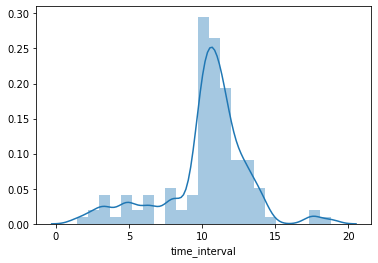

In [9]:
# distribution of time interval
sns.distplot(long_interval_heart_rate_df['time_interval'] / np.timedelta64(1,'m'))

**HKQuantityTypeIdentifierRestingHeartRate**

In [10]:
# number of rows with different startdate and endadate for resting heart rate type
heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
              (heart_rate_df['type'] == 'HKQuantityTypeIdentifierRestingHeartRate')].shape[0]

178

In [11]:
heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
              (heart_rate_df['type'] == 'HKQuantityTypeIdentifierRestingHeartRate')] 

,type,sourceName,unit,creationDate,startDate,endDate,value
84482,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-08-30 22:44:47-08:00,2019-08-29 23:04:37-08:00,2019-08-30 22:41:00-08:00,57.0
84483,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-08-31 12:54:55-08:00,2019-08-30 23:00:38-08:00,2019-08-31 12:48:43-08:00,51.0
84484,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-01 19:58:45-08:00,2019-08-31 23:02:07-08:00,2019-09-01 19:51:54-08:00,54.0
84485,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-02 20:58:46-08:00,2019-09-01 23:24:49-08:00,2019-09-02 20:58:24-08:00,48.0
84486,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-03 20:50:01-08:00,2019-09-02 23:00:12-08:00,2019-09-03 20:43:50-08:00,50.0
...,...,...,...,...,...,...,...
84655,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2020-02-19 15:33:18-08:00,2020-02-19 00:00:48-08:00,2020-02-19 15:28:17-08:00,57.0
84656,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2020-02-20 18:22:00-08:00,2020-02-20 00:05:21-08:00,2020-02-20 18:18:04-08:00,55.0
84657,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2020-02-21 14:08:06-08:00,2020-02-21 00:02:53-08:00,2020-02-21 14:04:57-08:00,56.0
84658,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2020-02-22 17:09:15-08:00,2020-02-22 01:05:04-08:00,2020-02-22 17:05:14-08:00,56.0


count                       178
mean     0 days 16:45:10.488764
std      0 days 05:20:02.409189
min             0 days 00:45:28
25%      0 days 12:39:01.750000
50%      0 days 17:04:51.500000
75%             0 days 20:56:07
max             1 days 07:29:58
Name: time_interval, dtype: object


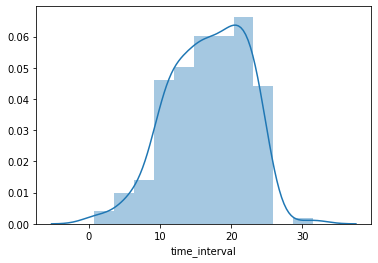

In [12]:
# look at the interval distribution
resting_heart_rate_interval = heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
                                            (heart_rate_df['type'] == 'HKQuantityTypeIdentifierRestingHeartRate')].copy()
resting_heart_rate_interval['time_interval'] = resting_heart_rate_interval['endDate'] - resting_heart_rate_interval['startDate']
print(resting_heart_rate_interval['time_interval'].describe())

sns.distplot(resting_heart_rate_interval['time_interval'] / np.timedelta64(1,'h'))

**HKQuantityTypeIdentifierWalkingHeartRateAverage**

In [13]:
# number of rows with different startdate and endadate for walking heart rate type
heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
              (heart_rate_df['type'] == 'HKQuantityTypeIdentifierWalkingHeartRateAverage')].shape[0]

171

In [14]:
heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
              (heart_rate_df['type'] == 'HKQuantityTypeIdentifierWalkingHeartRateAverage')] 

,type,sourceName,unit,creationDate,startDate,endDate,value
84660,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2019-08-30 15:40:57-08:00,2019-08-29 23:04:37-08:00,2019-08-30 15:40:53-08:00,96.0
84661,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2019-08-31 13:42:13-08:00,2019-08-30 23:00:38-08:00,2019-08-31 13:42:08-08:00,108.0
84662,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2019-09-01 11:58:33-08:00,2019-08-31 23:02:07-08:00,2019-09-01 11:58:28-08:00,99.0
84663,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2019-09-02 16:56:14-08:00,2019-09-01 23:24:49-08:00,2019-09-02 16:56:09-08:00,95.0
84664,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2019-09-03 15:47:30-08:00,2019-09-02 23:00:12-08:00,2019-09-03 15:47:25-08:00,94.0
...,...,...,...,...,...,...,...
84826,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2020-02-18 17:54:51-08:00,2020-02-18 00:04:15-08:00,2020-02-18 17:54:49-08:00,119.5
84827,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2020-02-19 19:04:56-08:00,2020-02-19 00:00:48-08:00,2020-02-19 19:04:54-08:00,99.5
84828,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2020-02-20 18:51:19-08:00,2020-02-20 00:05:21-08:00,2020-02-20 18:51:17-08:00,107.0
84829,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2020-02-21 15:20:29-08:00,2020-02-21 00:02:53-08:00,2020-02-21 15:20:28-08:00,96.0


count                       171
mean     0 days 17:11:04.263157
std      0 days 03:50:07.722193
min             0 days 02:20:56
25%      0 days 15:09:46.500000
50%             0 days 17:12:10
75%      0 days 19:00:16.500000
max             1 days 08:47:28
Name: time_interval, dtype: object


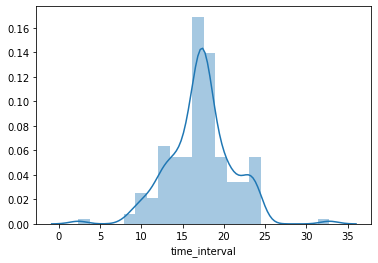

In [15]:
# look at the interval distribution
walking_heart_rate_interval = heart_rate_df[(heart_rate_df['startDate'] != heart_rate_df['endDate']) & 
                                            (heart_rate_df['type'] == 'HKQuantityTypeIdentifierWalkingHeartRateAverage')].copy()
walking_heart_rate_interval['time_interval'] = walking_heart_rate_interval['endDate'] - walking_heart_rate_interval['startDate']
print(walking_heart_rate_interval['time_interval'].describe())

sns.distplot(walking_heart_rate_interval['time_interval'] / np.timedelta64(1,'h'))

### Q2: Relationship between HeartRate, RestingHeartRate, and WalkingHeartRate -- Does the first one aggregated the other two as well?

HeartRate data include all the heart rate record on a more frequent level (second in most cases), while you can find overlap time period in RestingHeartRate and WalkingHeartRate datasets, which indicate the average resting / walking heart rate in a given time period.  

In [16]:
heart_rate = heart_rate_df[(heart_rate_df['startDate'] == heart_rate_df['endDate']) & 
              (heart_rate_df['type'] == 'HKQuantityTypeIdentifierHeartRate')] 
resting_heart_rate = heart_rate_df[heart_rate_df['type'] == 'HKQuantityTypeIdentifierRestingHeartRate'] 
walking_heart_rate = heart_rate_df[heart_rate_df['type'] == 'HKQuantityTypeIdentifierWalkingHeartRateAverage'] 

In [17]:
resting_heart_rate.head(10)

,type,sourceName,unit,creationDate,startDate,endDate,value
84482,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-08-30 22:44:47-08:00,2019-08-29 23:04:37-08:00,2019-08-30 22:41:00-08:00,57.0
84483,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-08-31 12:54:55-08:00,2019-08-30 23:00:38-08:00,2019-08-31 12:48:43-08:00,51.0
84484,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-01 19:58:45-08:00,2019-08-31 23:02:07-08:00,2019-09-01 19:51:54-08:00,54.0
84485,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-02 20:58:46-08:00,2019-09-01 23:24:49-08:00,2019-09-02 20:58:24-08:00,48.0
84486,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-03 20:50:01-08:00,2019-09-02 23:00:12-08:00,2019-09-03 20:43:50-08:00,50.0
84487,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-04 22:59:40-08:00,2019-09-03 23:06:44-08:00,2019-09-04 22:58:19-08:00,53.0
84488,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-05 08:09:16-08:00,2019-09-04 23:08:00-08:00,2019-09-05 08:04:10-08:00,54.0
84489,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-06 18:50:01-08:00,2019-09-05 23:03:38-08:00,2019-09-06 18:43:36-08:00,53.0
84490,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-07 16:38:49-08:00,2019-09-06 23:16:19-08:00,2019-09-07 16:36:26-08:00,54.0
84491,HKQuantityTypeIdentifierRestingHeartRate,Yu’s Apple Watch,count/min,2019-09-08 10:23:32-08:00,2019-09-07 23:47:03-08:00,2019-09-08 10:23:03-08:00,51.0


In [18]:
# let's try to find the corresponding record from 2019-08-29 23:04:37-08:00 to 2019-08-30 22:41:00-08:00 in HeartRate
heart_rate_sub = heart_rate[(heart_rate['startDate'] >= '2019-08-29 23:04:37-08:00') & 
                           (heart_rate['startDate'] < '2019-08-30 22:41:00-08:00')]
print(heart_rate_sub['value'].mean())

heart_rate_sub

74.64912456140351


,type,sourceName,unit,creationDate,startDate,endDate,value
39,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-29 23:05:28-08:00,2019-08-29 23:04:37-08:00,2019-08-29 23:04:37-08:00,79.0
40,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-30 07:30:04-08:00,2019-08-29 23:06:53-08:00,2019-08-29 23:06:53-08:00,75.0
41,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-30 07:46:02-08:00,2019-08-30 07:44:10-08:00,2019-08-30 07:44:10-08:00,78.0
42,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-30 07:53:48-08:00,2019-08-30 07:48:46-08:00,2019-08-30 07:48:46-08:00,79.0
43,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-30 07:55:42-08:00,2019-08-30 07:52:16-08:00,2019-08-30 07:52:16-08:00,81.0
...,...,...,...,...,...,...,...
262,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-30 22:19:27-08:00,2019-08-30 22:14:02-08:00,2019-08-30 22:14:02-08:00,77.0
263,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-30 22:26:25-08:00,2019-08-30 22:20:02-08:00,2019-08-30 22:20:02-08:00,66.0
264,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-30 22:29:46-08:00,2019-08-30 22:26:23-08:00,2019-08-30 22:26:23-08:00,55.0
265,HKQuantityTypeIdentifierHeartRate,Yu’s Apple Watch,count/min,2019-08-30 22:34:21-08:00,2019-08-30 22:30:15-08:00,2019-08-30 22:30:15-08:00,58.0


In [19]:
# is there corresponding records in walking heart rate dataset as well?
walking_heart_rate_sub = walking_heart_rate[(walking_heart_rate['startDate'] >= '2019-08-29 23:04:37-08:00') & 
                                            (walking_heart_rate['startDate'] < '2019-08-30 22:41:00-08:00')]
print(walking_heart_rate_sub['value'].mean())

walking_heart_rate_sub.head()

96.0


,type,sourceName,unit,creationDate,startDate,endDate,value
84660,HKQuantityTypeIdentifierWalkingHeartRateAverage,Yu’s Apple Watch,count/min,2019-08-30 15:40:57-08:00,2019-08-29 23:04:37-08:00,2019-08-30 15:40:53-08:00,96.0


### Q3: Explore HeartRate Data -- Heart rate difference between day/night, weekday/weekend, etc.

Key Insights:  
1. Though the trend seems indicating that my avg heart rate has increased dramatically since Nov, this is NOT TRUE (well, otherwise it's scary)!!! This is mainly due to the fact that during workouts, much more heart rate data points were recorded;  
2. My average heart rate is obviously much higher at night around 20-22 PM, which is consistent with my regular workout time;  
3. From the heart rate heatmap, you can also tell that I sleep later on weekends and also get up later...  

In [20]:
# Let's only look at those heart rate records on second level (with equal startdate and enddate)
heart_rate = heart_rate_df[(heart_rate_df['startDate'] == heart_rate_df['endDate']) & 
              (heart_rate_df['type'] == 'HKQuantityTypeIdentifierHeartRate')].iloc[:,[4,6]]
heart_rate.head()

,startDate,value
0,2019-08-29 19:45:14-08:00,93.0
1,2019-08-29 19:47:20-08:00,89.0
2,2019-08-29 19:53:11-08:00,87.0
3,2019-08-29 19:57:39-08:00,78.0
4,2019-08-29 20:03:24-08:00,84.0


In [21]:
# generate more time columns
heart_rate['startHour'] = heart_rate['startDate'].dt.floor('h')
heart_rate['startDay'] = heart_rate['startDate'].dt.floor('D')
heart_rate['id_weekday'] = heart_rate['startDate'].dt.weekday_name
heart_rate['id_hour'] = heart_rate['startDate'].dt.hour

heart_rate['id_weekday'] = pd.Categorical(heart_rate['id_weekday'],
                                          categories=['Monday', 'Tuesday', 'Wednesday', 
                                                      'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                          ordered=True)
heart_rate['id_hour'] = heart_rate['id_hour'].astype('object')


heart_rate.head()

,startDate,value,startHour,startDay,id_weekday,id_hour
0,2019-08-29 19:45:14-08:00,93.0,2019-08-29 19:00:00-08:00,2019-08-29 00:00:00-08:00,Thursday,19
1,2019-08-29 19:47:20-08:00,89.0,2019-08-29 19:00:00-08:00,2019-08-29 00:00:00-08:00,Thursday,19
2,2019-08-29 19:53:11-08:00,87.0,2019-08-29 19:00:00-08:00,2019-08-29 00:00:00-08:00,Thursday,19
3,2019-08-29 19:57:39-08:00,78.0,2019-08-29 19:00:00-08:00,2019-08-29 00:00:00-08:00,Thursday,19
4,2019-08-29 20:03:24-08:00,84.0,2019-08-29 20:00:00-08:00,2019-08-29 00:00:00-08:00,Thursday,20


In [22]:
# let's look at the distribution of heart rate value
heart_rate['value'].describe()

count    84352.000000
mean        90.106535
std         22.844077
min         44.000000
25%         72.000000
50%         86.000000
75%        107.000000
max        174.000000
Name: value, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


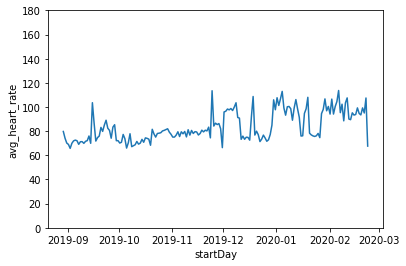

In [23]:
# plot a trendline of daily average heart rate
heart_rate_day = heart_rate.groupby('startDay')['value'].agg(avg_heart_rate = 'mean', record_num = 'count').reset_index()
ax = sns.lineplot(x = 'startDay', y = 'avg_heart_rate', data = heart_rate_day)
ax.set_ylim([0, 180])
plt.show()

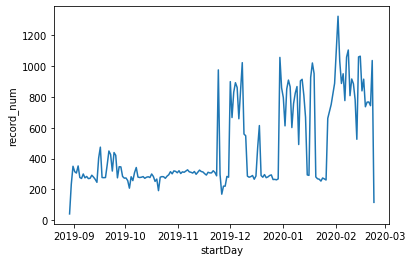

In [24]:
# the average heart rate trend looks pretty weird... let's look at the number of records. 
# Seems like the higher number of records caused this higher average.
# Maybe becuase I increased my workout intensity in Nov thus more high heart rate records were generated? 
sns.lineplot(x = 'startDay', y = 'record_num', data = heart_rate_day)

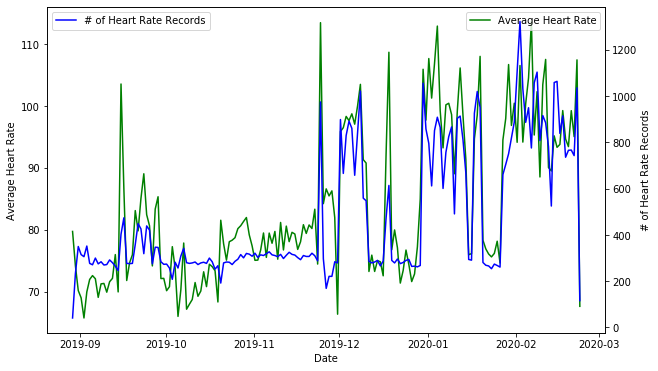

In [25]:
# let's put the two charts together
# seems like they perfectly aligned :)
fig = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x = 'startDay', y = 'avg_heart_rate', data = heart_rate_day, 
                  color = 'g',
                  label = 'Average Heart Rate')
ax.legend(loc = 1)
ax.set_xlabel('Date')
ax.set_ylabel('Average Heart Rate')
ax2 = plt.twinx()
sns.lineplot(x = 'startDay', y = 'record_num', data = heart_rate_day, 
             color = 'b', ax=ax2, 
             label = '# of Heart Rate Records')
ax2.legend(loc=0)
ax2.set_ylabel('# of Heart Rate Records')
plt.show()

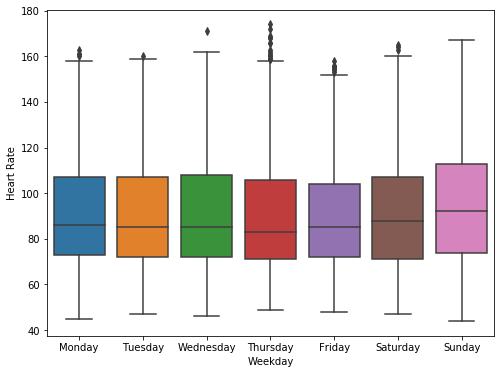

In [26]:
# Let's see how heart rate distribution differs between weekday and weekends
# well, not much difference seen
fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot(x = 'id_weekday', y = 'value', data = heart_rate)
ax.set_xlabel('Weekday')
ax.set_ylabel('Heart Rate')
plt.show()

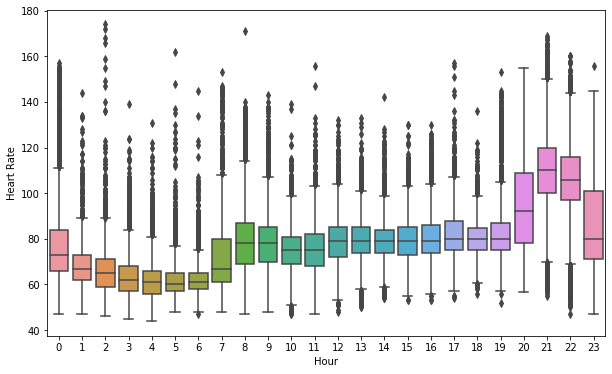

In [27]:
# And the heart rate distribution between hours? 
# -- obviously heart rate is much higher during workout time (typically 20-22) and lower during sleep (0-8)
fig = plt.figure(figsize=(10, 6))
ax = sns.boxplot(x = 'id_hour', y = 'value', data = heart_rate)
ax.set_xlabel('Hour')
ax.set_ylabel('Heart Rate')
plt.show()

In [28]:
# next, let's plot a heatmap of avg heart beat by hour and weekday
heart_rate_heatmap = heart_rate.groupby(['id_hour', 'id_weekday'])['value'].agg(avg_heart_rate = 'mean', 
                                                                              record_num = 'count').reset_index()

heart_rate_heatmap = heart_rate_heatmap.sort_values(['id_weekday', 'id_hour'])
heart_rate_heatmap

,id_hour,id_weekday,avg_heart_rate,record_num
0,0,Monday,70.394891,307
7,1,Monday,67.679619,306
14,2,Monday,64.362298,311
21,3,Monday,62.838384,297
28,4,Monday,61.598769,309
...,...,...,...,...
139,19,Sunday,98.098808,529
146,20,Sunday,100.816838,912
153,21,Sunday,114.878855,3659
160,22,Sunday,107.526018,2139


In [29]:
heart_rate_heatmap.dtypes

id_hour              int64
id_weekday        category
avg_heart_rate     float64
record_num           int64
dtype: object

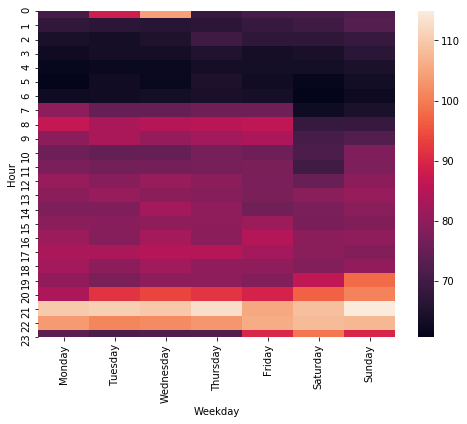

In [30]:
# it's pretty clear that my avg heart rate is much higher at night around 20-22 
# (as that's the typically time of me woring out)
# Another thing you will notice is that I sleep earlier on weekdays, and get up later on weekends...
heart_rate_heatmap_plt = heart_rate_heatmap.pivot("id_hour", "id_weekday", "avg_heart_rate")
fig = plt.figure(figsize=(8, 6))
ax = sns.heatmap(heart_rate_heatmap_plt)
ax.set_xlabel('Weekday')
ax.set_ylabel('Hour')
plt.show()

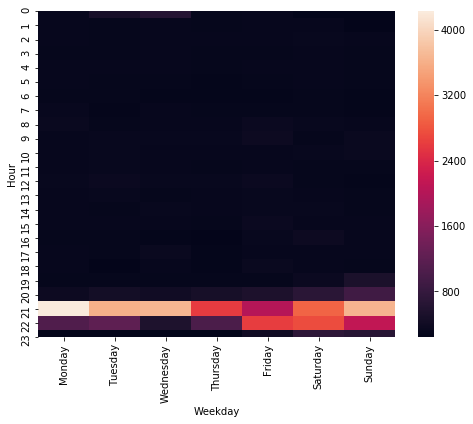

In [31]:
# we can also examine the assumption that more data points are recorded during workout with a heatmap
# this plot appear to be very extreme as much much more data points during workout recorded...
heart_rate_heatmap_plt = heart_rate_heatmap.pivot("id_hour", "id_weekday", "record_num")
fig = plt.figure(figsize=(8, 6))
ax = sns.heatmap(heart_rate_heatmap_plt)
ax.set_xlabel('Weekday')
ax.set_ylabel('Hour')
plt.show()

### Q4 - Explore RestingHeartRate and WalkingHeartRate Data -- How are they distributed and how different they are?

Both my resting heart and rate walking heart rate roughly follow normal distributions, with the average resting heart rate of 57 and average walking heart rate of 104. The standard deviation of walking heart rate is larger than the resting walking heart which makes sense -- your heart rate definitely fluctuate more during walking...  

**Resting Heart Rate**

In [32]:
resting_heart_rate = heart_rate_df[heart_rate_df['type'] == 'HKQuantityTypeIdentifierRestingHeartRate'].iloc[:,[4,6]]
resting_heart_rate['startHour'] = resting_heart_rate['startDate'].dt.floor('h')
resting_heart_rate['startDay'] = resting_heart_rate['startDate'].dt.floor('D')
resting_heart_rate['id_weekday'] = resting_heart_rate['startDate'].dt.weekday_name
resting_heart_rate['id_hour'] = resting_heart_rate['startDate'].dt.hour

resting_heart_rate['id_hour'] = resting_heart_rate['id_hour'].astype('object')
resting_heart_rate['id_weekday'] = pd.Categorical(resting_heart_rate['id_weekday'], 
                                                  categories=['Monday', 'Tuesday', 'Wednesday', 
                                                              'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                  ordered=True)
resting_heart_rate.head(10)

,startDate,value,startHour,startDay,id_weekday,id_hour
84482,2019-08-29 23:04:37-08:00,57.0,2019-08-29 23:00:00-08:00,2019-08-29 00:00:00-08:00,Thursday,23
84483,2019-08-30 23:00:38-08:00,51.0,2019-08-30 23:00:00-08:00,2019-08-30 00:00:00-08:00,Friday,23
84484,2019-08-31 23:02:07-08:00,54.0,2019-08-31 23:00:00-08:00,2019-08-31 00:00:00-08:00,Saturday,23
84485,2019-09-01 23:24:49-08:00,48.0,2019-09-01 23:00:00-08:00,2019-09-01 00:00:00-08:00,Sunday,23
84486,2019-09-02 23:00:12-08:00,50.0,2019-09-02 23:00:00-08:00,2019-09-02 00:00:00-08:00,Monday,23
84487,2019-09-03 23:06:44-08:00,53.0,2019-09-03 23:00:00-08:00,2019-09-03 00:00:00-08:00,Tuesday,23
84488,2019-09-04 23:08:00-08:00,54.0,2019-09-04 23:00:00-08:00,2019-09-04 00:00:00-08:00,Wednesday,23
84489,2019-09-05 23:03:38-08:00,53.0,2019-09-05 23:00:00-08:00,2019-09-05 00:00:00-08:00,Thursday,23
84490,2019-09-06 23:16:19-08:00,54.0,2019-09-06 23:00:00-08:00,2019-09-06 00:00:00-08:00,Friday,23
84491,2019-09-07 23:47:03-08:00,51.0,2019-09-07 23:00:00-08:00,2019-09-07 00:00:00-08:00,Saturday,23


In [33]:
# one thing to notice is that since the resting heart rate has a much longer time interval, 
# the start time is not evenly distributed among hours
# so I will not go into hour level in the below analysis
resting_heart_rate.groupby('id_hour')['value'].count()

id_hour
0     80
1      6
2      6
6      1
7      1
8     17
16     3
21     1
23    63
Name: value, dtype: int64

In [34]:
# let's look at the resting heart rate distribution
resting_heart_rate['value'].describe()

count    178.000000
mean      57.202247
std        4.174661
min       48.000000
25%       54.000000
50%       58.000000
75%       59.000000
max       73.000000
Name: value, dtype: float64

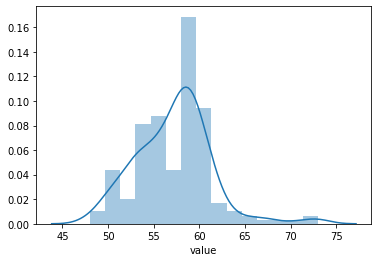

In [35]:
sns.distplot(resting_heart_rate['value'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


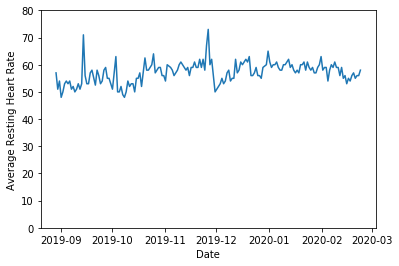

In [36]:
# let's also look at the average resting heart rate trend
# This looks much better than the all heart rate records trend as it only includes heart rate while resting
# though stil some weird spikes
resting_heart_rate_trend = resting_heart_rate.groupby('startDay')['value'].agg(avg_heart_rate = 'mean',
                                                                               record_num = 'count').reset_index()
ax = sns.lineplot(x = 'startDay', y = 'avg_heart_rate', data = resting_heart_rate_trend)
ax.set_xlabel('Date')
ax.set_ylabel('Average Resting Heart Rate')
ax.set_ylim([0, 80])
plt.show()

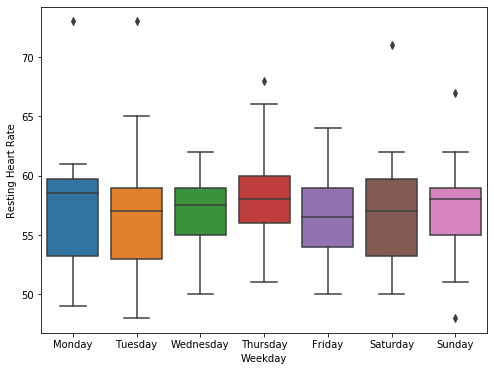

In [39]:
# Next, how about the resting heart rate distribution on each weekday?
fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot(x = 'id_weekday', y = 'value', data = resting_heart_rate)
ax.set_xlabel('Weekday')
ax.set_ylabel('Resting Heart Rate')
plt.show()

**Walking Heart Rate**

In [40]:
# Next is the walking heart rate:
walking_heart_rate = heart_rate_df[heart_rate_df['type'] == 'HKQuantityTypeIdentifierWalkingHeartRateAverage'].iloc[:,[4,6]]
walking_heart_rate['startHour'] = walking_heart_rate['startDate'].dt.floor('h')
walking_heart_rate['startDay'] = walking_heart_rate['startDate'].dt.floor('D')
walking_heart_rate['id_weekday'] =walking_heart_rate['startDate'].dt.weekday_name

walking_heart_rate['id_weekday'] = pd.Categorical(walking_heart_rate['id_weekday'], 
                                                  categories=['Monday', 'Tuesday', 'Wednesday', 
                                                              'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                  ordered=True)
walking_heart_rate.head(10)

,startDate,value,startHour,startDay,id_weekday
84660,2019-08-29 23:04:37-08:00,96.0,2019-08-29 23:00:00-08:00,2019-08-29 00:00:00-08:00,Thursday
84661,2019-08-30 23:00:38-08:00,108.0,2019-08-30 23:00:00-08:00,2019-08-30 00:00:00-08:00,Friday
84662,2019-08-31 23:02:07-08:00,99.0,2019-08-31 23:00:00-08:00,2019-08-31 00:00:00-08:00,Saturday
84663,2019-09-01 23:24:49-08:00,95.0,2019-09-01 23:00:00-08:00,2019-09-01 00:00:00-08:00,Sunday
84664,2019-09-02 23:00:12-08:00,94.0,2019-09-02 23:00:00-08:00,2019-09-02 00:00:00-08:00,Monday
84665,2019-09-03 23:06:44-08:00,95.0,2019-09-03 23:00:00-08:00,2019-09-03 00:00:00-08:00,Tuesday
84666,2019-09-04 23:08:00-08:00,103.0,2019-09-04 23:00:00-08:00,2019-09-04 00:00:00-08:00,Wednesday
84667,2019-09-05 23:03:38-08:00,88.0,2019-09-05 23:00:00-08:00,2019-09-05 00:00:00-08:00,Thursday
84668,2019-09-06 23:16:19-08:00,98.5,2019-09-06 23:00:00-08:00,2019-09-06 00:00:00-08:00,Friday
84669,2019-09-07 23:47:03-08:00,115.0,2019-09-07 23:00:00-08:00,2019-09-07 00:00:00-08:00,Saturday


In [41]:
# let's look at the walking heart rate distribution
walking_heart_rate['value'].describe()

count    171.000000
mean     103.751462
std        9.475724
min       80.000000
25%       97.000000
50%      104.000000
75%      109.000000
max      135.000000
Name: value, dtype: float64

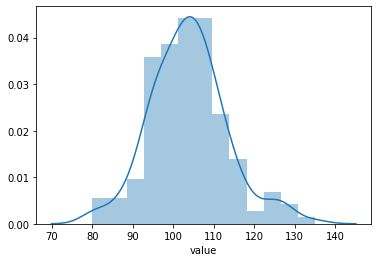

In [42]:
sns.distplot(walking_heart_rate['value'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


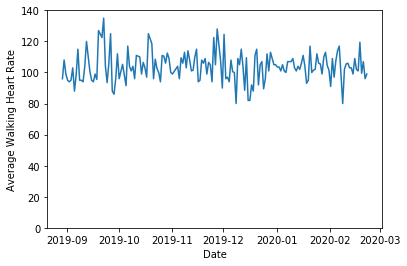

In [43]:
# average walking heart rate trend
# It's a relatively smooth trend with a higher average than the resting heart rate
walking_heart_rate_trend = walking_heart_rate.groupby('startDay')['value'].agg(avg_heart_rate = 'mean',
                                                                               record_num = 'count').reset_index()
ax = sns.lineplot(x = 'startDay', y = 'avg_heart_rate', data = walking_heart_rate_trend)
ax.set_xlabel('Date')
ax.set_ylabel('Average Walking Heart Rate')
ax.set_ylim([0, 140])
plt.show()

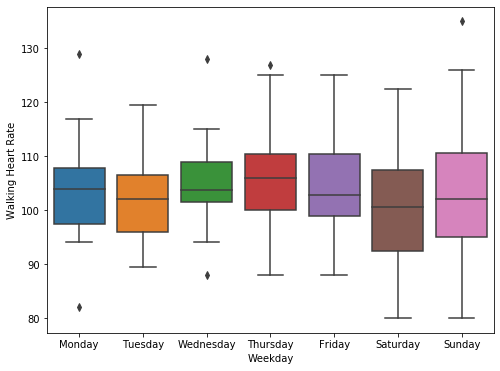

In [44]:
# walking heart rate distribution on each weekday?
fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot(x = 'id_weekday', y = 'value', data = walking_heart_rate)
ax.set_xlabel('Weekday')
ax.set_ylabel('Walking Heart Rate')
plt.show()

**Resting vs. Walking Heart Rate**

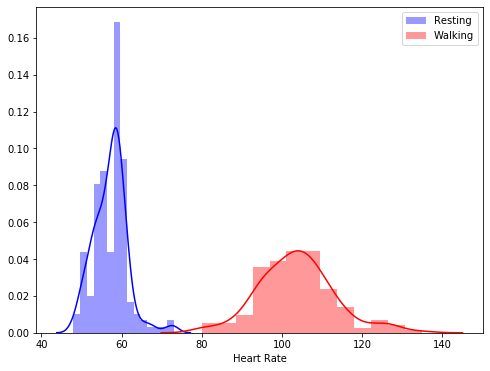

In [45]:
# Now! Let's plot resting and walking heart rate together to get a straightforward comparison
fig = plt.figure(figsize=(8, 6))
ax = sns.distplot(resting_heart_rate['value'], color = 'b', label = 'Resting')
ax.legend(loc = 0)
ax2 = sns.distplot(walking_heart_rate['value'], color = 'r', label = 'Walking')
ax2.legend(loc = 1)
ax.set_xlabel('Heart Rate')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


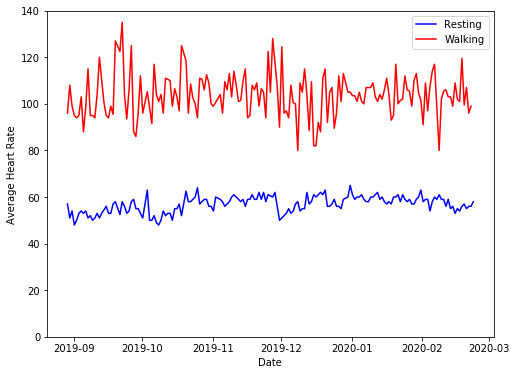

In [46]:
# avg daily heart rate comparison
fig = plt.figure(figsize=(8, 6))
ax = sns.lineplot(x = 'startDay', y = 'avg_heart_rate', data = resting_heart_rate_trend,
                 color = 'b', label = 'Resting')
ax.legend(loc = 0)
ax2 = sns.lineplot(x = 'startDay', y = 'avg_heart_rate', data = walking_heart_rate_trend,
                  color = 'r', label = 'Walking')
ax2.legend(loc = 1)
ax.set_xlabel('Date')
ax.set_ylabel('Average Heart Rate')
ax.set_ylim([0, 140])
plt.show()